## Training project 

In [1]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt 
import seaborn as sn                   
%matplotlib inline

In [2]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

## Data Exploration

In [3]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [4]:
train.shape

(31647, 18)

In [5]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [6]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [7]:
test.shape

(13564, 17)

In [8]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

 'subscribed' is the target variable as it is not present in the test dataset

### Univariate Analysis

In [9]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

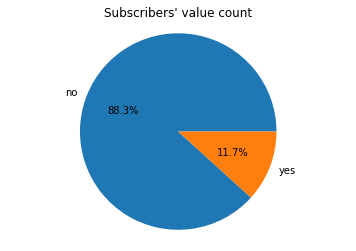

In [10]:
chart_labels = 'no','yes'
plt.pie(train['subscribed'].value_counts(),labels = chart_labels,autopct='%1.1f%%')
plt.title("Subscribers' value count")
plt.axis('equal')
plt.show()

Around 12% have subscribed to the term deposits.

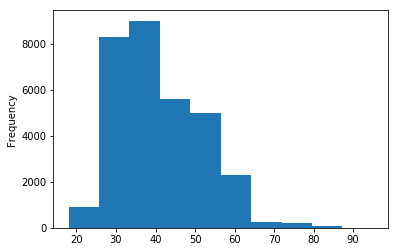

In [11]:
train['age'].plot.hist()

The population of clients is most dense between the ages of 20 to 60.

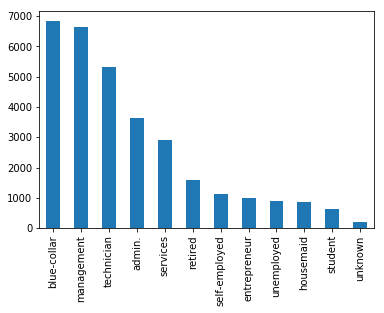

In [12]:
train['job'].value_counts().plot.bar()

We can infer when it comes to taking a term deposit, students are least in number and blue collared and management job holders are the most in number

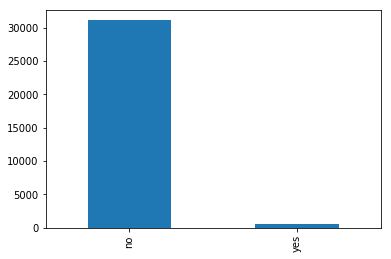

In [13]:
train['default'].value_counts().plot.bar()

The clients with default history is very very less. So, most clients are regular with their term deposits.

### Bivariate Analysis

In [14]:
pd.crosstab(train['job'],train['subscribed'])

subscribed,no,yes
job,,
admin.,3179,452
blue-collar,6353,489
entrepreneur,923,85
housemaid,795,79
management,5716,923
retired,1212,362
self-employed,983,140
services,2649,254
student,453,182


Text(0, 0.5, 'Percentage')

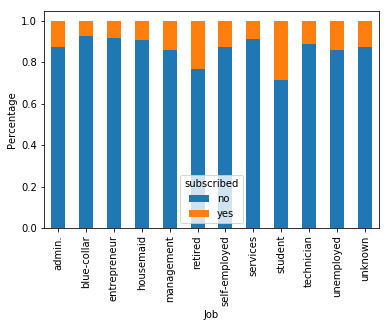

In [15]:
job_subs = pd.crosstab(train['job'],train['subscribed'])
job_subs.div(job_subs.sum(1).astype(float), axis=0).plot.bar(stacked = True)
plt.xlabel('Job')
plt.ylabel('Percentage')

Even though the number of students is less in the data set, they have subscribed most to the term deposit when compared to other job types. Retired people have also subscribed more to term deposits in comparison with the other job types in the data set.

In [16]:
pd.crosstab(train['default'],train['subscribed'])

subscribed,no,yes
default,,
no,27388,3674
yes,544,41


Text(0, 0.5, 'Percentage')

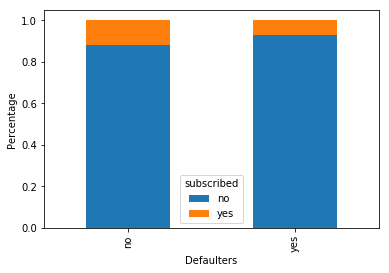

In [17]:
def_subs = pd.crosstab(train['default'],train['subscribed'])
def_subs.div(def_subs.sum(1).astype(float), axis=0).plot.bar(stacked = True)
plt.xlabel('Defaulters')
plt.ylabel('Percentage')

Clients with no previous default history have more chances of subscribing to a term deposit.

In [18]:
train['subscribed'].replace('no', 0,inplace=True)
train['subscribed'].replace('yes', 1,inplace=True)

In [19]:
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


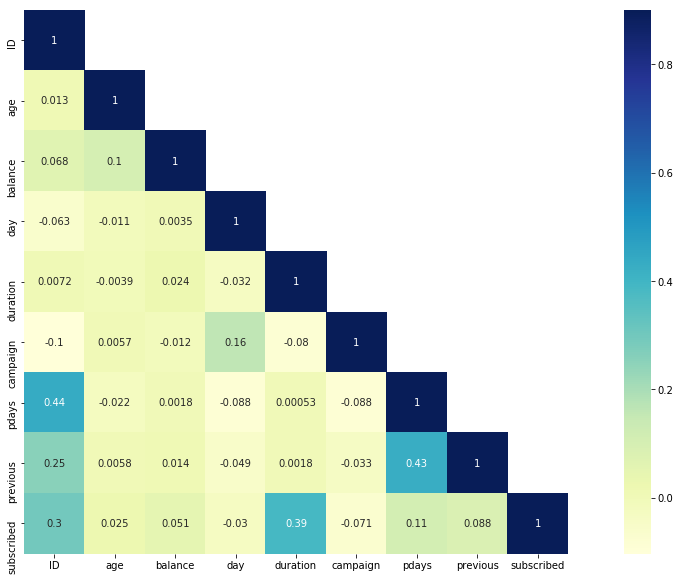

In [20]:
corr = train.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

We can see that the duration is highly correlated with the subscribed attribute since as duration becomes longer, the cliet becomes more interested in term deposits and better are their chances of subscribing.

In [21]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

There are no missing values in the training dataset.

## Model Building

In [22]:
target = train['subscribed']

In [23]:
train = train.drop('subscribed',axis=1)

In [24]:
train = pd.get_dummies(train)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_target, y_train, y_target = train_test_split(train, target, test_size = 0.3, random_state=12)

### Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
logreg = LogisticRegression()

In [29]:
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
pred = logreg.predict(X_target)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_target, pred)

0.8931016324381253

### Decision Tree 

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
clf = DecisionTreeClassifier(max_depth=5)

In [35]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [36]:
pred_d = clf.predict(X_target)

In [37]:
accuracy_score(y_target,pred_d)

0.9058451816745655

After manipulating and checking the depth of the decision tree , we can see that a tree with depth 5 has a better accuracy score than logistic regression model. The accuracy score is about 90%.

Now, using Decision Tree model on test dataset:

In [38]:
test = pd.get_dummies(test)

In [39]:
pred_test = clf.predict(test)

We will save the prediction of test dataset in a separate file called submission_final.

In [51]:
submission_final = pd.DataFrame()

In [52]:
submission_final['ID'] = test['ID']
submission_final['will_subscribe'] = pred_test

In [53]:
submission_final['will_subscribe'].replace(0,'no',inplace=True)
submission_final['will_subscribe'].replace(1,'yes',inplace=True)

In [54]:
submission_final.head()

,ID,will_subscribe
0,38441,no
1,40403,yes
2,3709,no
3,37422,no
4,12527,no


In [43]:
submission_final.to_csv('submission_final.csv', header=True, index=False)